# Лабораторная работа 3. Частотный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

## Загрузка данных

In [2]:
all_data = pd.read_csv ('dataset_group.csv',header=None, names = ['date', 'id', 'item'])
all_data

,date,id,item
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


In [3]:
unique_id = all_data.id.unique()
print('Количество покупателей (по id):', len(unique_id))

unique_items = all_data.item.unique()
print('Количество товаров: ', len(unique_items))

Количество покупателей (по id): 1139
Количество товаров:  38


In [4]:
dataset = [[elem for elem in all_data[all_data.id == id].item if elem in unique_items] for id in unique_id]

## Подготовка данных

In [5]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns = te.columns_)
df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


## Ассоциативный анализ с использованием алгоритма Apriori

In [6]:
results = apriori(df, min_support = 0.3, use_colnames = True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


Получили наборы товаров, которые чаще всего встречаются. Данные наборы покупали не менее чем 30% покупателей. 

In [7]:
results = apriori(df, min_support = 0.3, use_colnames = True, max_len = 1)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


Получили наборы товаров, состоящие только из одного элемента

In [8]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]

print('Количество наборов, которые имеют длину 2:', len(results))
results

Количество наборов, которые имеют длину 2: 14


,support,itemsets,length
38,0.310799,"(aluminum foil, vegetables)",2
39,0.300263,"(vegetables, bagels)",2
40,0.310799,"(vegetables, cereals)",2
41,0.309043,"(vegetables, cheeses)",2
42,0.308165,"(vegetables, dinner rolls)",2
43,0.306409,"(vegetables, dishwashing liquid/detergent)",2
44,0.326602,"(eggs, vegetables)",2
45,0.302897,"(ice cream, vegetables)",2
46,0.309043,"(vegetables, laundry detergent)",2
47,0.311677,"(vegetables, lunch meat)",2


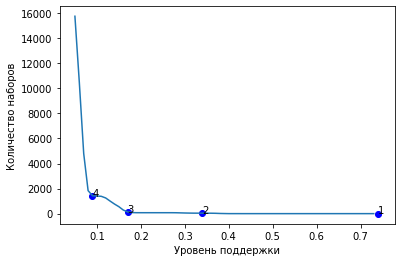

In [9]:
min_supports = np.arange(0.05, 1, 0.01)
items_count = np.array([])
max_len = 0

for min_support in min_supports:
    results = apriori(df, min_support = min_support, use_colnames = True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    max_len_curr = np.max(results['length'])
    
    if (max_len == 0):
        max_len = max_len_curr
    if (max_len != max_len_curr):
        plt.scatter(min_support, len(results), c = 'b')
        plt.text(min_support, len(results), str(max_len))
        max_len = max_len_curr
    if (np.isnan(max_len_curr)):
        break
    items_count = np.append(items_count, len(results))

plt.plot(min_supports[:len(items_count)], items_count)
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество наборов')
plt.show()

Построен график, демонстрирующий зависимость между уровнем поддрежки и количеством наборов.
На графике также видно, что:
    1.  Для набора размера 1 уровень поддержки, при котором перестают генерироваться наборы, равен примерно 0.75
    2.  Для набора размера 2 уровень поддержки, при котором перестают генерироваться наборы, равен примерно 0.34
    3.  Для набора размера 3 уровень поддержки, при котором перестают генерироваться наборы, равен примерно 0.18
    4.  Для набора размера 4 уровень поддержки, при котором перестают генерироваться наборы, равен примерно 0.09

In [10]:
results = apriori(df, min_support = 0.38, use_colnames = True, max_len = 1)
new_items = [list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data.id == id].item if elem in new_items] for id in unique_id]
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


In [11]:
te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
new_df = pd.DataFrame(te_ary, columns = te.columns_)
new_df

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


Aссоциативный анализ при уровне поддержки 0.3 для нового датасета

In [12]:
results = apriori(new_df, min_support = 0.3, use_colnames = True)
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


Отличие заключается в том, что пропали наборы данных, уровень поддержки которых меньше 0.38. Результат прошлого ассоциативного анализа содержит результат этого.

Aссоциативный анализ при уровне поддержки 0.15

In [13]:
results = apriori(new_df, min_support = 0.15, use_colnames = True)
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
...,...,...
127,0.158033,"(eggs, vegetables, soda)"
128,0.157155,"(yogurt, eggs, vegetables)"
129,0.158033,"(vegetables, poultry, lunch meat)"
130,0.157155,"(vegetables, waffles, lunch meat)"


Вывод всех наборов размер которых больше 1 и в котором есть 'yogurt' или 'waffles'

In [14]:
results['condition'] = results['itemsets'].apply(lambda i_set: len(i_set) > 1 and ('yogurt' in i_set or 'waffles' in i_set))
results = results[results['condition']]
del results['condition']

print('Количество наборов, подходящих под условие: ', len(results), '\n')
print(results)

Количество наборов, подходящих под условие:  30 

      support                                 itemsets
27   0.169447                 (aluminum foil, waffles)
28   0.177349                  (aluminum foil, yogurt)
40   0.159789                        (waffles, bagels)
41   0.162423                         (yogurt, bagels)
52   0.160667                       (cereals, waffles)
53   0.172081                        (yogurt, cereals)
63   0.172959                       (waffles, cheeses)
64   0.172081                        (yogurt, cheeses)
73   0.169447                  (waffles, dinner rolls)
74   0.166813                   (yogurt, dinner rolls)
82   0.175593  (waffles, dishwashing liquid/detergent)
83   0.158033   (yogurt, dishwashing liquid/detergent)
90   0.169447                          (eggs, waffles)
91   0.174715                           (yogurt, eggs)
97   0.172959                     (ice cream, waffles)
98   0.156277                      (yogurt, ice cream)
103  0.184372  

In [15]:
diff_df = set(list(df)) - set(list(new_df))
diff_dataset = [[elem for elem in all_data[all_data.id == id].item if elem in diff_df] for id in unique_id]
te = TransactionEncoder()
te_ary = te.fit_transform(diff_dataset)
diff_df = pd.DataFrame(te_ary, columns=te.columns_)
diff_df

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False


In [16]:
results = apriori(diff_df, min_support = 0.2, use_colnames = True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
5,0.370500,(fruits)
6,0.345917,(hand soap)
7,0.375768,(individual meals)
8,0.376646,(juice)
9,0.371378,(ketchup)


Правило, для вывода всех наборов, в которых хотя бы два элемента начинаются на 's'

In [18]:
results = apriori(df, min_support = 0.05, use_colnames = True)
results = results[results['itemsets'].apply(lambda iset: len([item for item in iset if item.startswith('s')]) >= 2)]
results

,support,itemsets
675,0.137840,"(sandwich loaves, sandwich bags)"
676,0.146620,"(sandwich bags, shampoo)"
677,0.158911,"(sandwich bags, soap)"
678,0.162423,"(sandwich bags, soda)"
679,0.147498,"(sandwich bags, spaghetti sauce)"
...,...,...
15722,0.064091,"(yogurt, vegetables, sugar, soda)"
15729,0.058824,"(spaghetti sauce, toilet paper, vegetables, su..."
15730,0.050044,"(spaghetti sauce, vegetables, tortillas, sugar)"
15731,0.057946,"(spaghetti sauce, vegetables, waffles, sugar)"


Правило для вывода всех наборов, для которых уровень поддержки изменяется от 0.1 до 0.25

In [19]:
results = apriori(df, min_support=0.1, use_colnames=True)
results = results[results['support'].apply(lambda sup: sup > 0.1 and sup < 0.25)]
results

,support,itemsets
38,0.157155,"(aluminum foil, all- purpose)"
39,0.150132,"(all- purpose, bagels)"
40,0.144864,"(all- purpose, beef)"
41,0.147498,"(all- purpose, butter)"
42,0.151010,"(all- purpose, cereals)"
...,...,...
1401,0.135206,"(waffles, toilet paper, vegetables)"
1402,0.130817,"(yogurt, toilet paper, vegetables)"
1403,0.121159,"(waffles, vegetables, tortillas)"
1404,0.130817,"(yogurt, vegetables, tortillas)"
